<a href="https://colab.research.google.com/github/Homaoa/Dott/blob/main/Dott.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**First I take a look at the data set.**

In [49]:
url = '/content/dott_dsia_rides.csv'
df = pd.read_csv(url)
df.head()

,hex9_id_start,hex9_id_end,time_ride_start,time_ride_end,vehicle_id,ride_id,city_name,vehicle_type,vehicle_distribution,total_distance_meters,...,is_negative_rider_feedback,main_battery_level_before_ride,main_battery_level_after_ride,estimated_range_before_ride,estimated_range_after_ride,battery_id,battery_capacity,battery_voltage,date_battery_first_in_vehicle,vehicle_age_days
0,891f09acb8fffff,891f09ac96fffff,2023-05-12 13:36:30.835000+00:00,2023-05-12 13:44:19.047000+00:00,dc0yKzPokMd5HbM3Di2g,FVNOA14sFgTLMgyHaTg5,Malbork,scooter,O-1.1,2163.749919,...,False,89.0,79.0,23100.0,20100.0,NaN,NaN,NaN,NaN,1463.0
1,891f09acb0bffff,891f09acbb3ffff,2023-05-12 09:19:31.180000+00:00,2023-05-12 09:32:49.302000+00:00,DpDHvDDOe3dyWOafPaaK,Zv5iPNvNVodhuQydfVKj,Malbork,scooter,O-1.1,2803.942542,...,False,76.0,66.0,19200.0,16200.0,NaN,NaN,NaN,NaN,1466.0
2,891f09365d3ffff,891f09acb6bffff,2023-05-12 08:32:07.798000+00:00,2023-05-12 08:34:22.028000+00:00,bi74Es8Kl5zkrp3QyBhA,0U3YZKLAZnsQxfw7cL5T,Malbork,scooter,O-1.1,469.135966,...,False,14.0,12.0,600.0,0.0,NaN,NaN,NaN,NaN,1464.0
3,891f09364a3ffff,891f0936403ffff,2023-05-12 16:01:00.013000+00:00,2023-05-12 16:03:40.180000+00:00,O9RSvD1QiHnQJg4MPtAW,GeTyTWvmQiXIa5EyNSX9,Malbork,scooter,O-1.1,760.302020,...,False,93.0,91.0,24300.0,23700.0,NaN,NaN,NaN,NaN,1423.0
4,891f09acb4bffff,891f0936493ffff,2023-05-12 09:02:37.768000+00:00,2023-05-12 09:15:57.373000+00:00,WolxDt43G2cVCfkjgbn1,P8f6jyqcuZgp6qbMULiV,Malbork,scooter,O-1.1,2174.368374,...,False,78.0,68.0,19800.0,16800.0,NaN,NaN,NaN,NaN,1465.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47597 entries, 0 to 47596
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hex9_id_start                   47597 non-null  object 
 1   hex9_id_end                     47597 non-null  object 
 2   time_ride_start                 47597 non-null  object 
 3   time_ride_end                   47597 non-null  object 
 4   vehicle_id                      47597 non-null  object 
 5   ride_id                         47597 non-null  object 
 6   city_name                       47597 non-null  object 
 7   vehicle_type                    47597 non-null  object 
 8   vehicle_distribution            47597 non-null  object 
 9   total_distance_meters           47597 non-null  float64
 10  num_pauses                      47597 non-null  int64  
 11  is_negative_rider_feedback      47597 non-null  bool   
 12  main_battery_level_before_ride  

In [35]:
df['vehicle_id'].value_counts()

A0aTQBwLHplbq5IPeGQN    111
OreJh6ZqMH2eBD3AdITH    108
HD1TUMPoPWK9tjnMp7jh    108
KUO0N5KItLvtgZvIpo62    105
JKhxY1DLheYr5JFK0Hxc    105
                       ... 
mYaW1ghN37wjych8jP1m      1
fCpnWNVbJGKN5FuA1XwW      1
0ajCHeaXT5J1AFhpoz1w      1
b5pCcEHZDGqsx88a5vE4      1
ibomtRtle3jseHyfSwR0      1
Name: vehicle_id, Length: 1236, dtype: int64

**In order to understand the performance of the current formula, I decided to use the variable "total_distance_meters". I define a new variable called "difference". This variable is the difference between "estimated_range_before_ride" and "estimated_range_after_ride". The more this variable is similar to "total_distance_meters", the better the fomula is in predicting.
I also draw the two variables in the same chart to be able to compare them.**

In [50]:
df['difference'] = df['estimated_range_before_ride'] - df['estimated_range_after_ride']

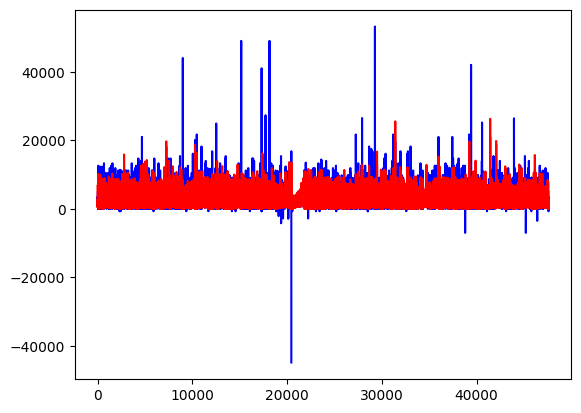

In [38]:
plt.plot(df['difference'], color = 'blue')
plt.plot(df['total_distance_meters'], color = 'red')

plt.show()

**We can see that there is differences between the variables, and the performance of our current formula can be improved.**

**Since the data set is big (more than 47000 rows), I decided to draw the above chart with a smaller portion of the data set, just to be able to see the chart more clearly.**

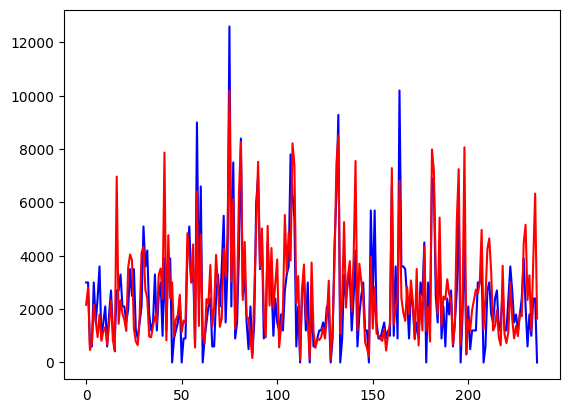

In [40]:
y_values1_first_half = df['difference'][:len(df['difference'])//200]
y_values2_first_half = df['total_distance_meters'][:len(df['total_distance_meters'])//200]

plt.plot(y_values1_first_half, color = 'blue')
plt.plot(y_values2_first_half, color = 'red')

plt.show()

**After investigating the data set, I realized that there are some other variables that can be used in order to predict the range for a vehicle based on its battery charge.**

**We have two variables called "main_battery_level_before_ride" and "main_battery_level_after_ride". The difference between these two gives us the amount of change that happened in the battery level during that trip. I call this variable "battery_level_change".**

In [51]:
df['battery_level_change'] = df['main_battery_level_before_ride'] - df['main_battery_level_after_ride']

**Now, I can introduce a new heuristic to get prediction for the range with.
We have the "main_battery_level_after_ride", the "total_distance_meters" of each trip, and the "battery_level_change". By dividing the total_distance to battery_level_change, we get the range for the usage of one battery level. Then by multiplying that in the level of the battery, we will have the range for the battery.
I do that for both before and after data.**

In [52]:
df['range_estimated_before'] = df['main_battery_level_before_ride'] * (df['total_distance_meters'] / df['battery_level_change'])

In [53]:
df['range_estimated_after'] = df['main_battery_level_after_ride'] * (df['total_distance_meters'] / df['battery_level_change'])
df.head()

,hex9_id_start,hex9_id_end,time_ride_start,time_ride_end,vehicle_id,ride_id,city_name,vehicle_type,vehicle_distribution,total_distance_meters,...,estimated_range_after_ride,battery_id,battery_capacity,battery_voltage,date_battery_first_in_vehicle,vehicle_age_days,difference,battery_level_change,range_estimated_before,range_estimated_after
0,891f09acb8fffff,891f09ac96fffff,2023-05-12 13:36:30.835000+00:00,2023-05-12 13:44:19.047000+00:00,dc0yKzPokMd5HbM3Di2g,FVNOA14sFgTLMgyHaTg5,Malbork,scooter,O-1.1,2163.749919,...,20100.0,NaN,NaN,NaN,NaN,1463.0,3000.0,10.0,19257.374279,17093.624360
1,891f09acb0bffff,891f09acbb3ffff,2023-05-12 09:19:31.180000+00:00,2023-05-12 09:32:49.302000+00:00,DpDHvDDOe3dyWOafPaaK,Zv5iPNvNVodhuQydfVKj,Malbork,scooter,O-1.1,2803.942542,...,16200.0,NaN,NaN,NaN,NaN,1466.0,3000.0,10.0,21309.963318,18506.020777
2,891f09365d3ffff,891f09acb6bffff,2023-05-12 08:32:07.798000+00:00,2023-05-12 08:34:22.028000+00:00,bi74Es8Kl5zkrp3QyBhA,0U3YZKLAZnsQxfw7cL5T,Malbork,scooter,O-1.1,469.135966,...,0.0,NaN,NaN,NaN,NaN,1464.0,600.0,2.0,3283.951759,2814.815793
3,891f09364a3ffff,891f0936403ffff,2023-05-12 16:01:00.013000+00:00,2023-05-12 16:03:40.180000+00:00,O9RSvD1QiHnQJg4MPtAW,GeTyTWvmQiXIa5EyNSX9,Malbork,scooter,O-1.1,760.302020,...,23700.0,NaN,NaN,NaN,NaN,1423.0,600.0,2.0,35354.043925,34593.741905
4,891f09acb4bffff,891f0936493ffff,2023-05-12 09:02:37.768000+00:00,2023-05-12 09:15:57.373000+00:00,WolxDt43G2cVCfkjgbn1,P8f6jyqcuZgp6qbMULiV,Malbork,scooter,O-1.1,2174.368374,...,16800.0,NaN,NaN,NaN,NaN,1465.0,3000.0,10.0,16960.073317,14785.704943


**Now we have a new formula to predict the range for a vehicle with the data that we already have. I can also draw the same graph for this new variables, just like the graphs I draw before.**

In [54]:
df['new_difference'] = df['range_estimated_before'] - df['range_estimated_after']

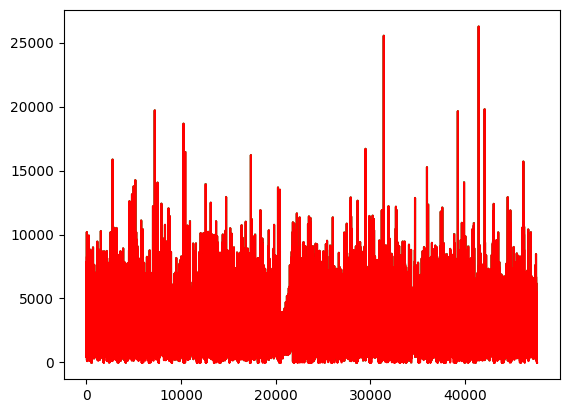

In [55]:
plt.plot(df['new_difference'], color = 'green')
plt.plot(df['total_distance_meters'], color = 'red')

plt.show()

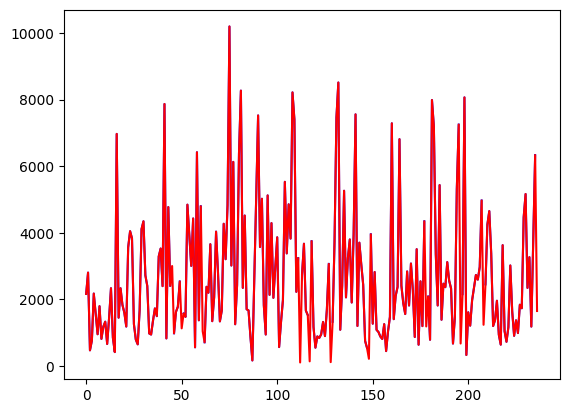

In [56]:
y_values1_first_half = df['new_difference'][:len(df['new_difference'])//200]
y_values2_first_half = df['total_distance_meters'][:len(df['total_distance_meters'])//200]

plt.plot(y_values1_first_half, color = 'blue')
plt.plot(y_values2_first_half, color = 'red')

plt.show()

**As we can see in the chart, the new heuristic formula works very well.**

**The users will not feel any difference using the app. They will still receive data about the battery level and the range possible by the vehicle. So the user exprience, with regards to how using the app, will not be affected. But they will receive better predictions that will increase their satisfaction.
Also, maintaining the solution is not difficult at all.**